In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

CC = "monax"

data = {}
data["Time (s)"] = []
data["Throughput (Mbps)"] = []
data["Flow"] = []

df = pd.read_csv("./datasets/mean_data.csv")


fix_delay_data = {}
for i in range(0,80,10):
    fix_delay_data[i] = {}
    fix_delay_data[i]["trace_mean"] = []
    fix_delay_data[i]["precision"] = []
    
fix_band_data = {}
for i in range(10,21):
    fix_band_data[i] = {}
    fix_band_data[i]["delay_mean"] = []
    fix_band_data[i]["precision"] = []
    
    
    
# df = df.sort_values(by=["delay_mean", "loss_mean"], ascending=True)

for i in range(1,5000):
    row = df.iloc[i]
    delay_mean = row[0]
    trace_mean = row[1]
    precision = row[2]
    if(delay_mean>=70):
        break
    
    fix_delay_data[delay_mean]["trace_mean"].append(trace_mean)
    fix_delay_data[delay_mean]["precision"].append(precision)
    
    fix_band_data[trace_mean]["delay_mean"].append(delay_mean)
    fix_band_data[trace_mean]["precision"].append(precision)

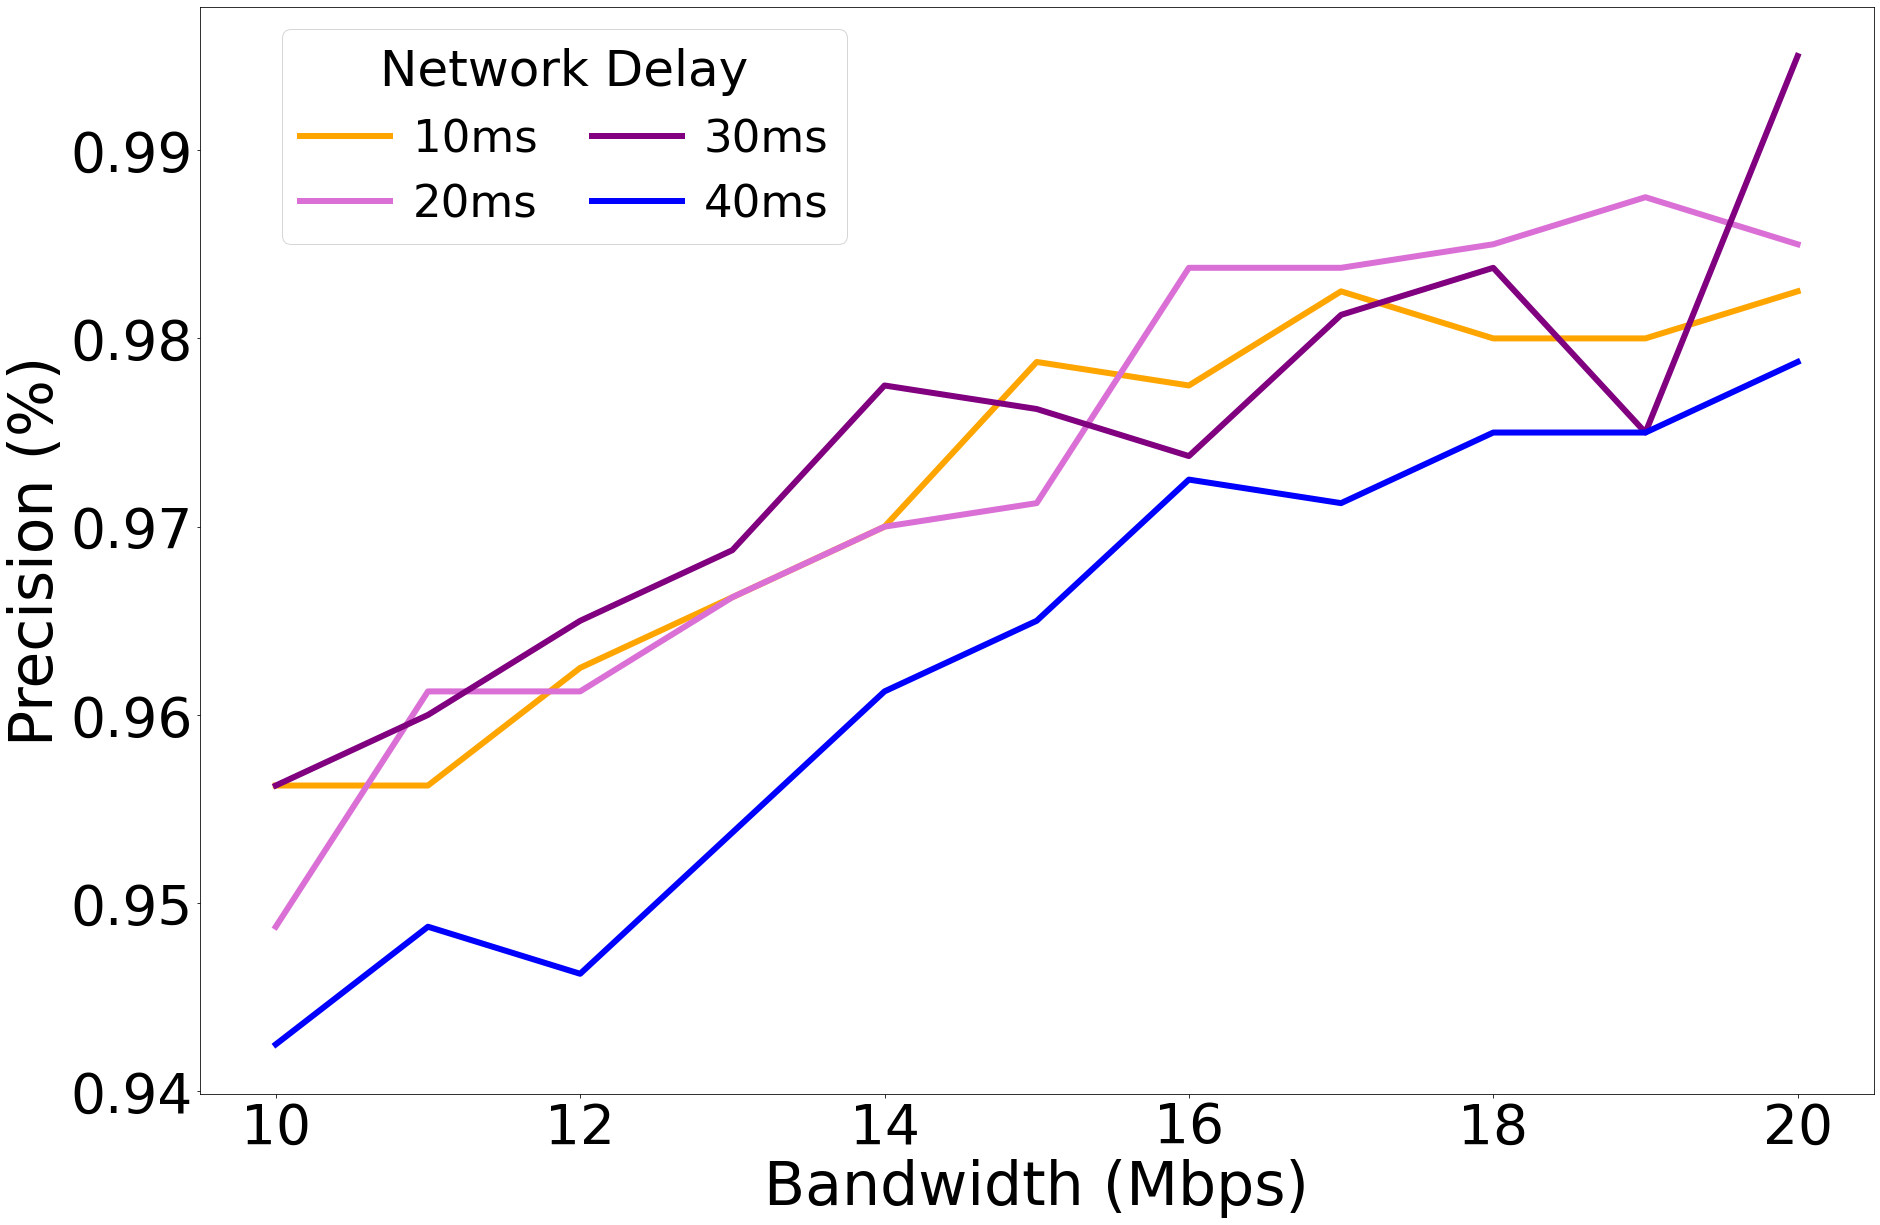

In [16]:
# FIX_DATA = "base_delay"
FIX_DATA = "control_interval"

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 6

FIG_SIZE = (30, 20)

TITLE_FONTSIZE = 60
LEGEND_FONTSIZE = 45

LABEL_FONTSIZE = 60
STICKS_FONTSIZE = 55


fig, axes = plt.subplots(1, 1, figsize=FIG_SIZE)

count = 0
delay_mean_list = [num for num in range(10,50,10)]
for delay_mean in delay_mean_list:
    axes.plot(fix_delay_data[delay_mean]["trace_mean"], fix_delay_data[delay_mean]["precision"], color=COLORS[count], label=f"{delay_mean}ms",  linewidth=LINE_WIDTH)
    count += 1

plt.legend(loc=1, title="Network Delay", ncol=2, fontsize=LEGEND_FONTSIZE, bbox_to_anchor = (0.4,1), title_fontsize=LEGEND_FONTSIZE+5, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Bandwidth (Mbps)",fontsize=LABEL_FONTSIZE)
plt.ylabel("Precision (%)",fontsize=LABEL_FONTSIZE)

# plt.xlim(70,120)
# plt.ylim(90,100)

#设置坐标刻度字体大小
plt.xticks(fontsize=STICKS_FONTSIZE)
plt.yticks(fontsize=STICKS_FONTSIZE)

# plt.title(f"")
plt.savefig(f"./001.png",bbox_inches = 'tight')
plt.show()


# fig, axes = plt.subplots(1, 1, figsize=FIG_SIZE)

# count = 0
# loss_mean_list = [num/100 for num in range(10,51,10)]
# for loss_mean in loss_mean_list:
#     axes.plot(fix_loss_data[loss_mean]["delay_mean"], fix_loss_data[loss_mean][sla_choices[sla]], color=COLORS[count], label=f"{loss_mean*100}%",  linewidth=LINE_WIDTH)
#     count += 1

# plt.legend(loc=1, title="Loss Rate", ncol=2, fontsize=LEGEND_FONTSIZE, bbox_to_anchor = (1,1), title_fontsize=TITLE_FONTSIZE, columnspacing=1.2, handletextpad=0.5)

# axes.grid(which='minor', c='lightgrey')

# #设置坐标标签标注和字体大小
# plt.xlabel("Network Delay (ms)",fontsize=LABEL_FONTSIZE)
# plt.ylabel("Precision (%)",fontsize=LABEL_FONTSIZE)

# # plt.ylim(80,100)

# #设置坐标刻度字体大小
# plt.xticks(fontsize=STICKS_FONTSIZE)
# plt.yticks(fontsize=STICKS_FONTSIZE)

# # plt.title(f"")
# plt.savefig(f"./delay_impact.png",bbox_inches = 'tight')
# plt.show()
    